In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir="Data"

In [3]:
img_height, img_width = 180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 576 files for training.


2022-12-17 00:15:10.761456: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Cricket Field', 'Forest Land', 'Grass', 'Hard Sand', 'Road', 'Tiles']

In [6]:
efficientnet_model = Sequential()

pretrained_model = tf.keras.applications.EfficientNetV2L(include_top=False,weights="imagenet",
                                                         input_shape=(180,180,3),pooling="avg",
                                                         classes=6)
for layer in pretrained_model.layers:
    layer.trainable=False
    
efficientnet_model.add(pretrained_model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(6,activation="softmax"))                                         

In [7]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 module_wrapper (ModuleWrapp  (None, 1280)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              655872    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 118,405,798
Trainable params: 658,950
Non-

In [8]:
efficientnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.losses.BinaryCrossentropy(),
                     metrics=["accuracy"])

In [9]:
epochs=10
history = efficientnet_model.fit(train_ds,
                           validation_data = val_ds,
                           epochs=epochs)

Epoch 1/10
18/18 [==============================] - 268s 13s/step - loss: 0.2271 - accuracy: 0.8403 - val_loss: 0.0884 - val_accuracy: 0.9167
Epoch 2/10
18/18 [==============================] - 185s 10s/step - loss: 0.0491 - accuracy: 0.9601 - val_loss: 0.0542 - val_accuracy: 0.9306
Epoch 3/10
18/18 [==============================] - 218s 12s/step - loss: 0.0233 - accuracy: 0.9896 - val_loss: 0.0424 - val_accuracy: 0.9444
Epoch 4/10
18/18 [==============================] - 219s 12s/step - loss: 0.0161 - accuracy: 0.9931 - val_loss: 0.0313 - val_accuracy: 0.9722
Epoch 5/10
18/18 [==============================] - 257s 14s/step - loss: 0.0103 - accuracy: 0.9948 - val_loss: 0.0274 - val_accuracy: 0.9861
Epoch 6/10
18/18 [==============================] - 191s 11s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9792
Epoch 7/10
18/18 [==============================] - 189s 11s/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0234 - val_accuracy: 0.9861
Epoch 

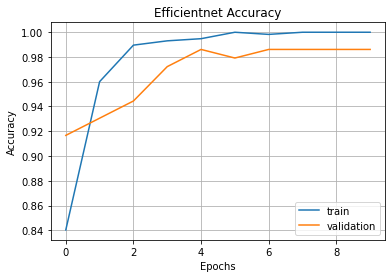

In [10]:
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.title("Efficientnet Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("efficientnet-accuracy.png")
plt.show()


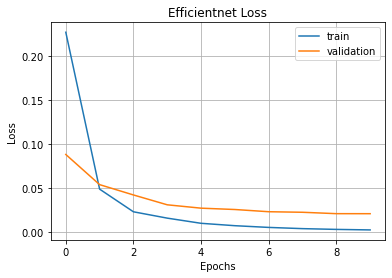

In [11]:
fig1 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("Efficientnet Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("efficientnet-loss.png")
plt.show()

In [12]:
np.mean(history.history["accuracy"])

0.9776041686534882